In [1]:
import os, shutil
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'

from keras.utils import image_dataset_from_directory

IMG_SIZE = 150

train_dataset = image_dataset_from_directory(train_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')
validation_dataset = image_dataset_from_directory(validation_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')
test_dataset = image_dataset_from_directory(test_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')

2024-06-22 19:37:58.654830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 19:38:00.597311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 40000 files belonging to 10 classes.


2024-06-22 19:38:08.334223: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 19:38:08.918228: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 19:38:08.918294: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 19:38:08.924826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 19:38:08.924962: I external/local_xla/xla/stream_executor

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [2]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base.trainable = False

In [3]:
from tensorflow import keras
from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])

In [4]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [5]:
callbacks_list = [
    #keras.callbacks.EarlyStopping(monitor="val_loss",patience=10),
    keras.callbacks.ModelCheckpoint(filepath='modelS_checkpoint_sgd.keras',save_best_only=True,monitor='val_acc',verbose=1)
]

In [6]:
model.compile(
loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["acc"])
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,callbacks=callbacks_list)

Epoch 1/30


2024-06-22 19:38:18.270714: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-06-22 19:38:20.765720: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.5513 - loss: 2.8784
Epoch 1: val_acc improved from -inf to 0.77440, saving model to modelS_checkpoint_sgd.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 82ms/step - acc: 0.5514 - loss: 2.8775 - val_acc: 0.7744 - val_loss: 0.1981
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.6087 - loss: 0.3503
Epoch 2: val_acc did not improve from 0.77440
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 80ms/step - acc: 0.6087 - loss: 0.3503 - val_acc: 0.7571 - val_loss: 0.2164
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.6226 - loss: 0.3625
Epoch 3: val_acc did not improve from 0.77440
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - acc: 0.6226 - loss: 0.3625 - val_acc: 0.7708 - val_loss: 0.2218
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.6318 - loss: 0.3720
Epoch 4: val_acc improved from 0.77440 to 0.78570, saving model to modelS_checkpoint_sgd.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - acc: 0.6318 

In [7]:
val_loss, val_acc = model.evaluate(validation_dataset)
print("Validation accuracy:", val_acc)

model.save('ModelT_with_Data_Aug.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - acc: 0.7620 - loss: 0.3367
Validation accuracy: 0.7601000070571899


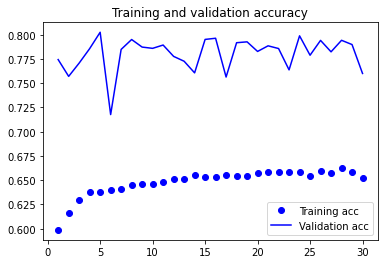

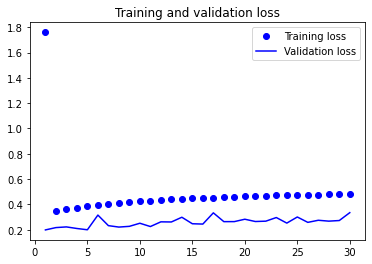

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()